In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings

warnings.simplefilter("ignore")

# Pre-Processing

In [58]:
data_df = pd.read_csv('./dataset/reddit_wsb.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [59]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(data_df)

title  score      id     url comms_num  created       body timestamp
Total         0      0       0       0         0        0      28449         0
Percent     0.0    0.0     0.0     0.0       0.0      0.0  53.488634       0.0
Types    object  int64  object  object     int64  float64     object    object

# WordCloud Visualization

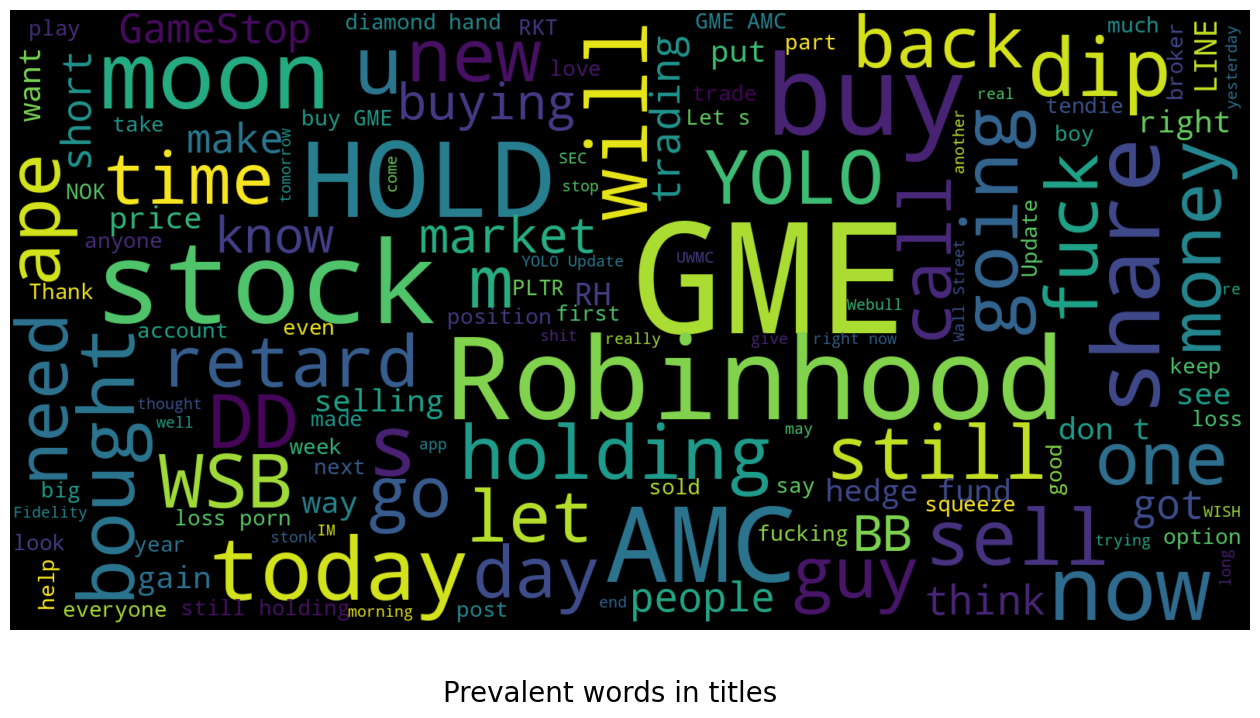

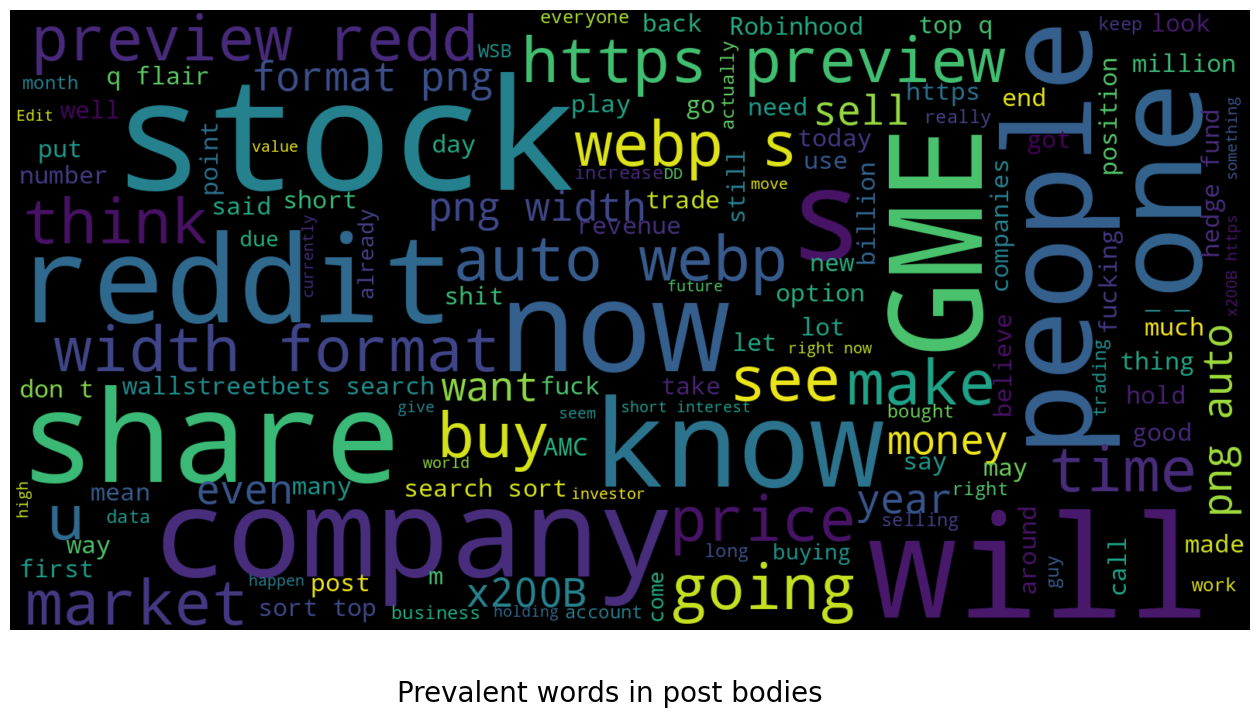

In [60]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    
show_wordcloud(data_df['title'], title = 'Prevalent words in titles')

show_wordcloud(data_df['body'], title = 'Prevalent words in post bodies')

# Sentiment Analysis

## nltk SentimentIntensityAnalyzer

In [61]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"
    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment Analysis: {title}")
    plt.tight_layout()
    plt.show()

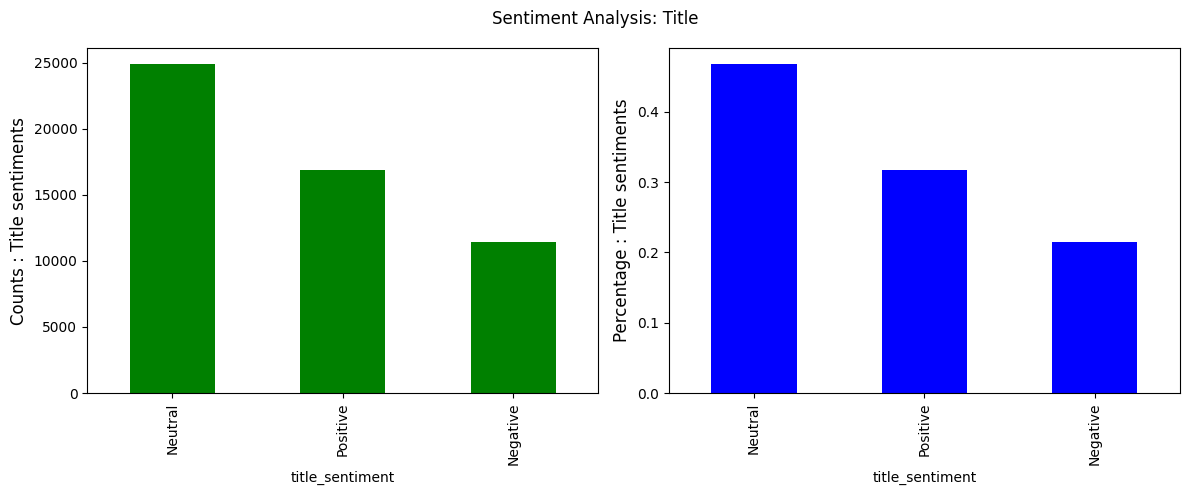

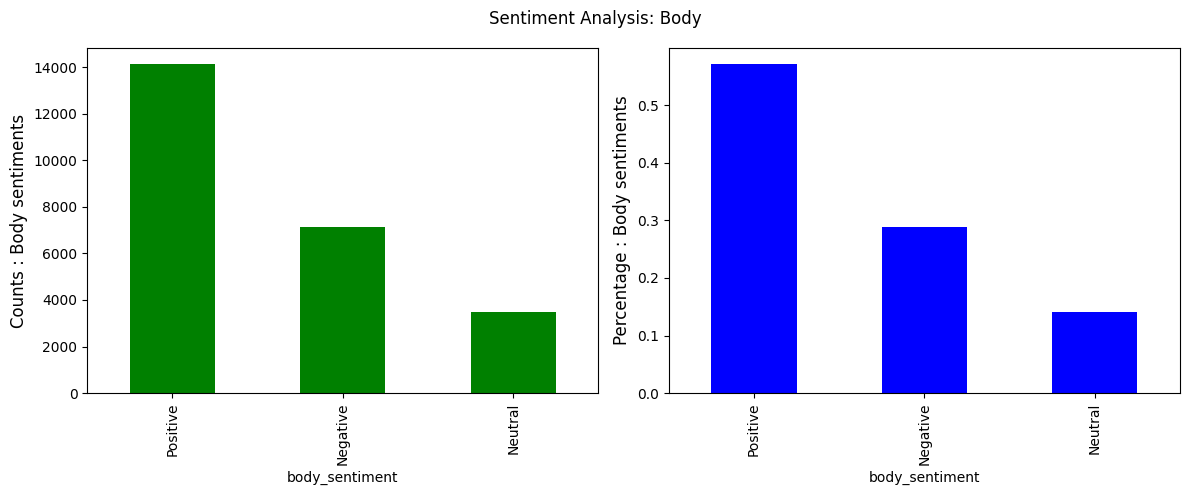

In [62]:
data_df['title_sentiment'] = data_df['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'title_sentiment', 'Title')

df = data_df.loc[~data_df.body.isna()]
df['body_sentiment'] = df['body'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'body_sentiment', 'Body')

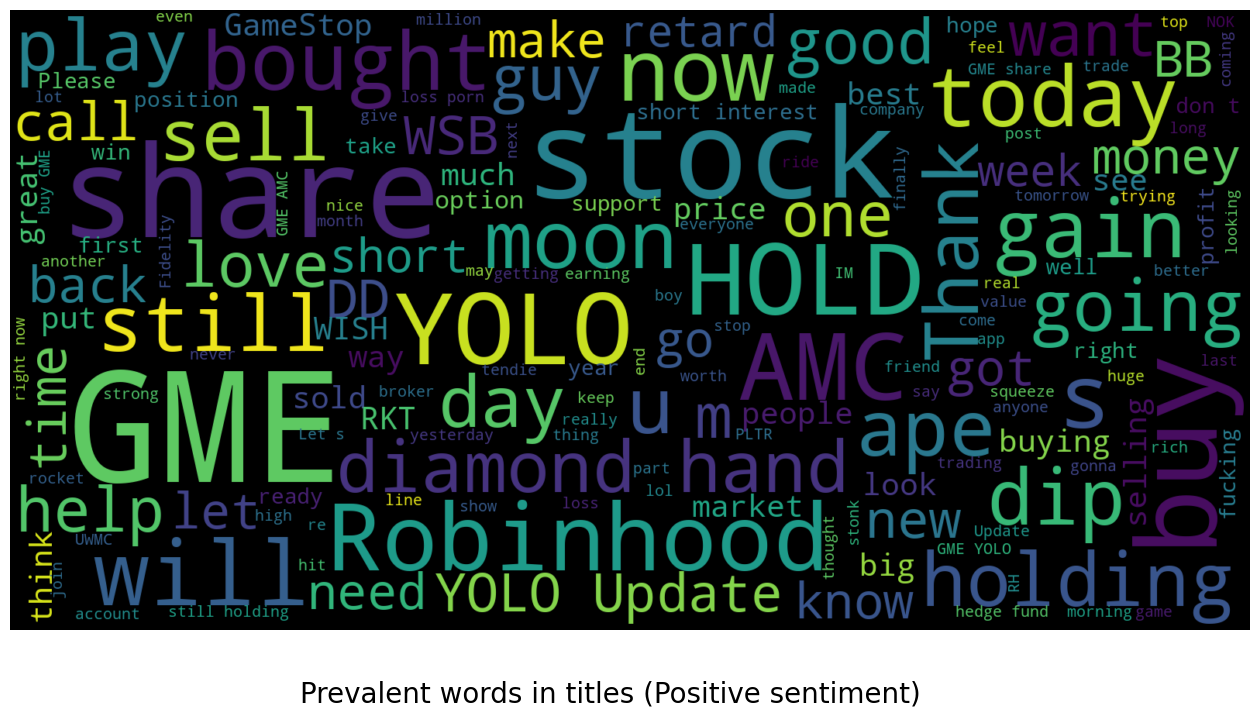

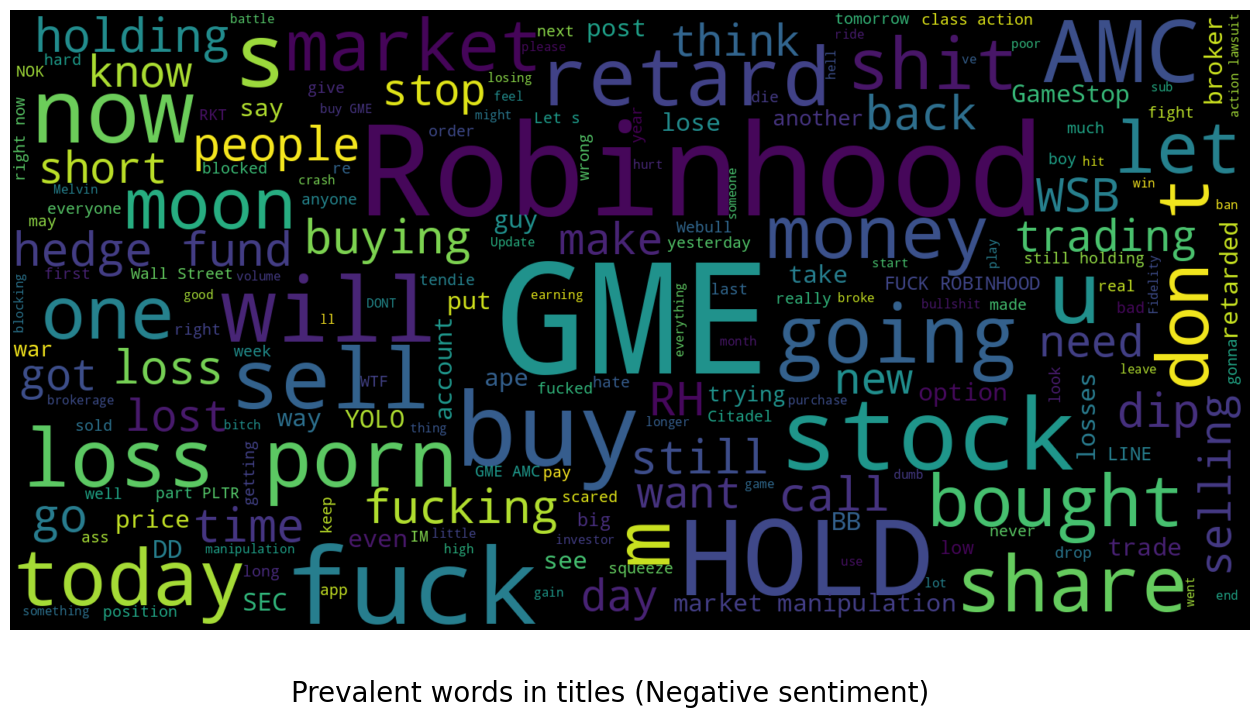

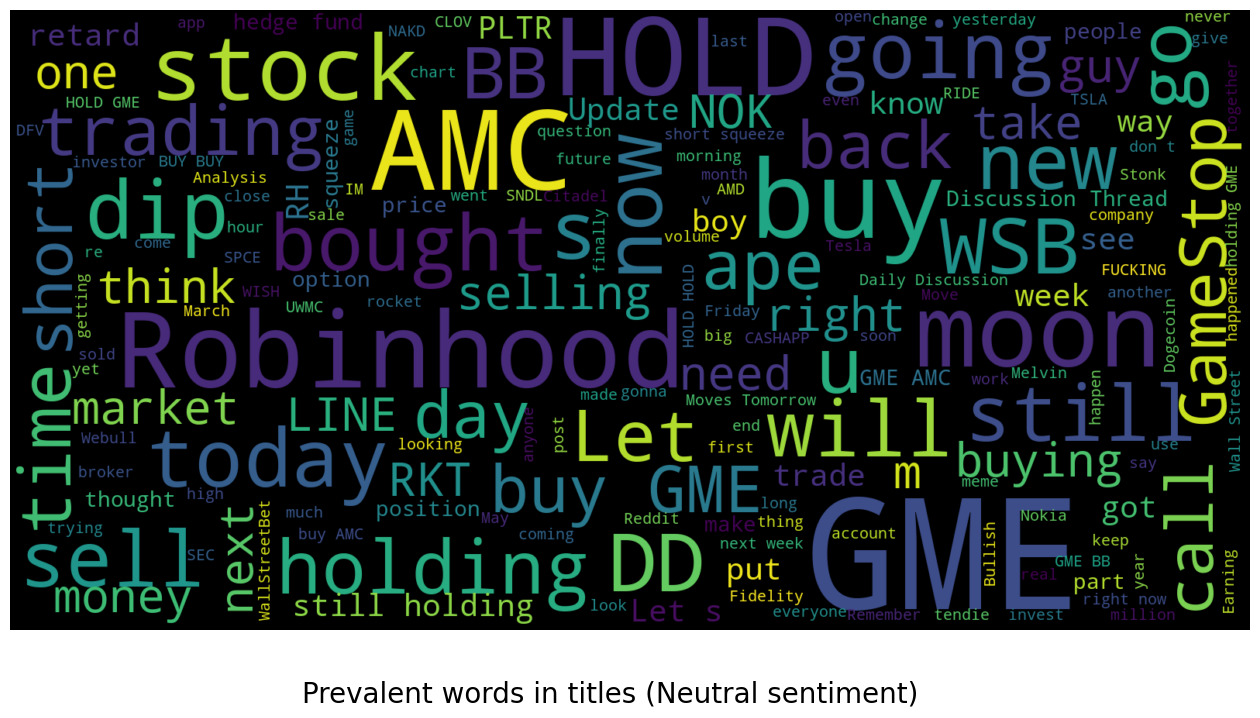

In [63]:
show_wordcloud(data_df.loc[data_df['title_sentiment']=='Positive', 'title'], title = 'Prevalent words in titles (Positive sentiment)')

show_wordcloud(data_df.loc[data_df['title_sentiment']=='Negative', 'title'], title = 'Prevalent words in titles (Negative sentiment)')

show_wordcloud(data_df.loc[data_df['title_sentiment']=='Neutral', 'title'], title = 'Prevalent words in titles (Neutral sentiment)')

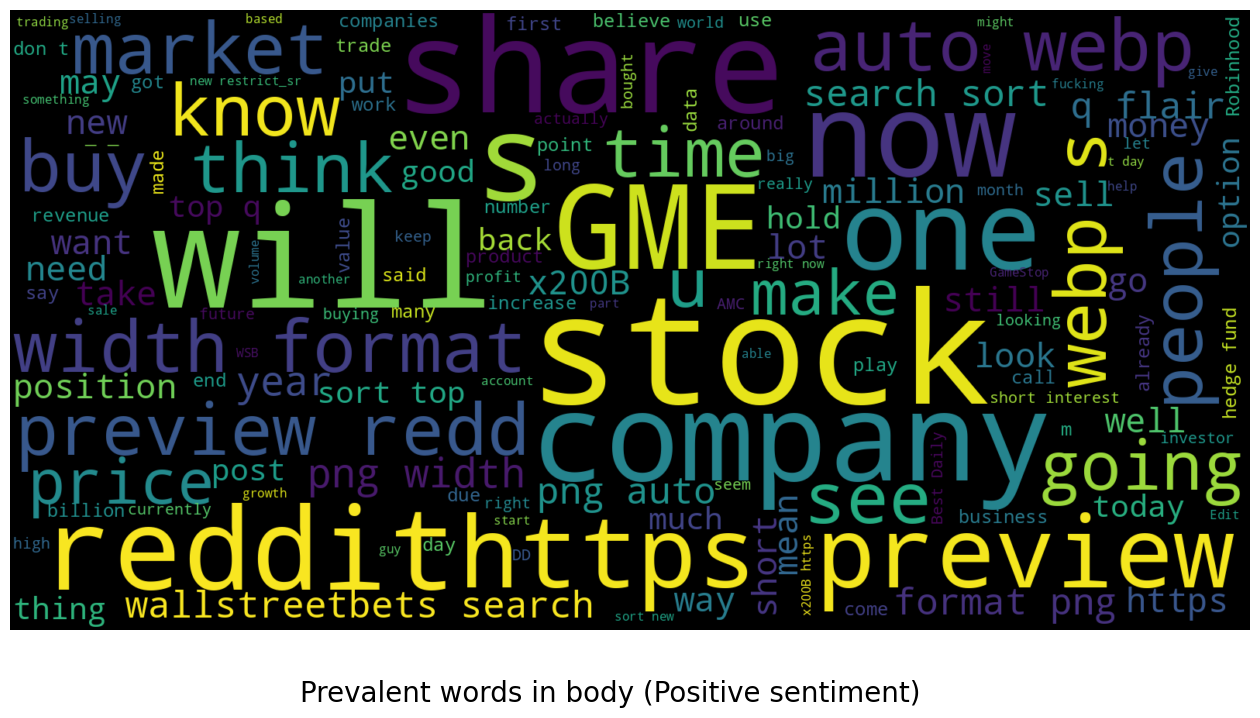

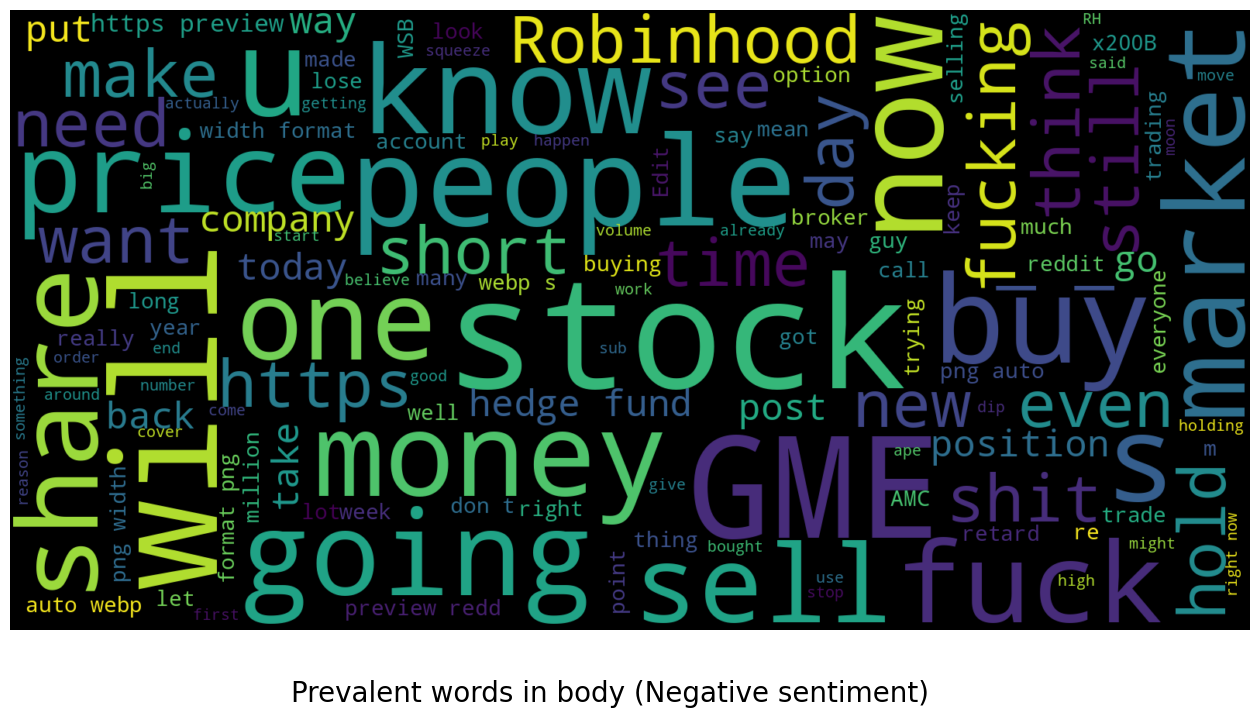

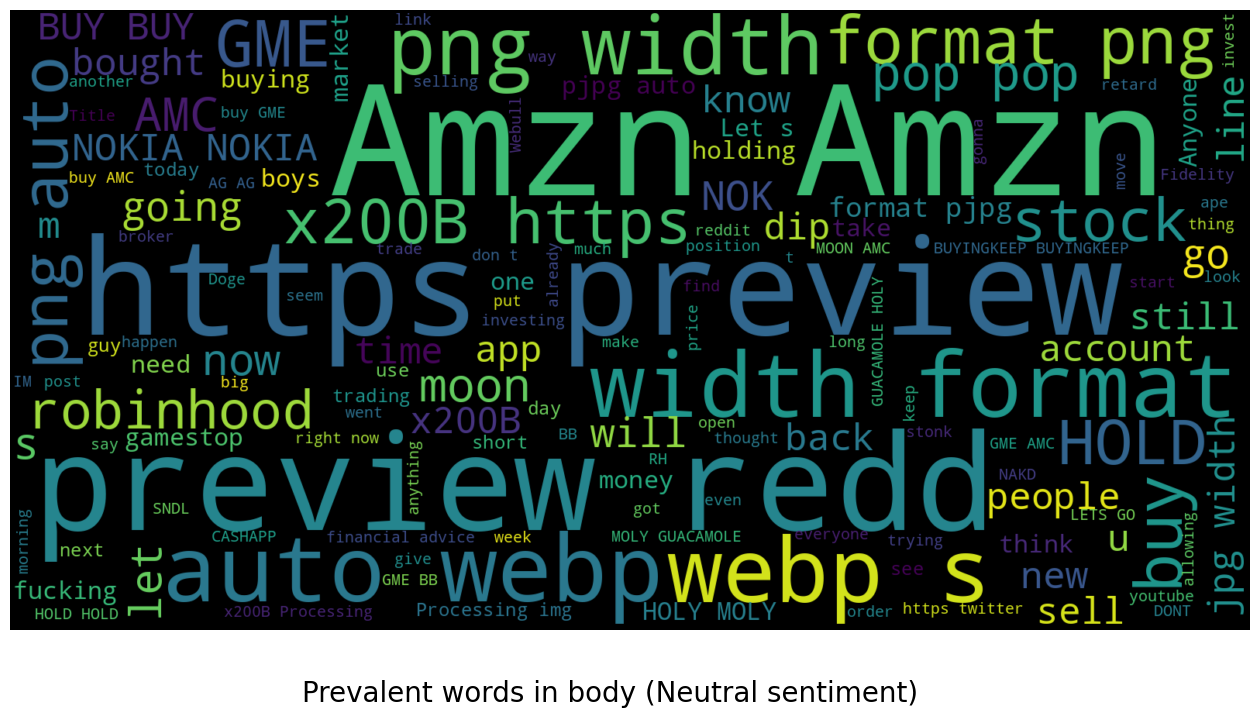

In [64]:
show_wordcloud(df.loc[df['body_sentiment']=='Positive', 'body'], title = 'Prevalent words in body (Positive sentiment)')

show_wordcloud(df.loc[df['body_sentiment']=='Negative', 'body'], title = 'Prevalent words in body (Negative sentiment)')

show_wordcloud(df.loc[df['body_sentiment']=='Neutral', 'body'], title = 'Prevalent words in body (Neutral sentiment)')

## TextBlob

In [65]:
def find_sentiment_polarity_textblob(post):
    blob = TextBlob(post)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

def find_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

def plot_sentiment_textblob(df, feature, title):
    polarity = df[feature+'_sentiment_polarity']
    subjectivity = df[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

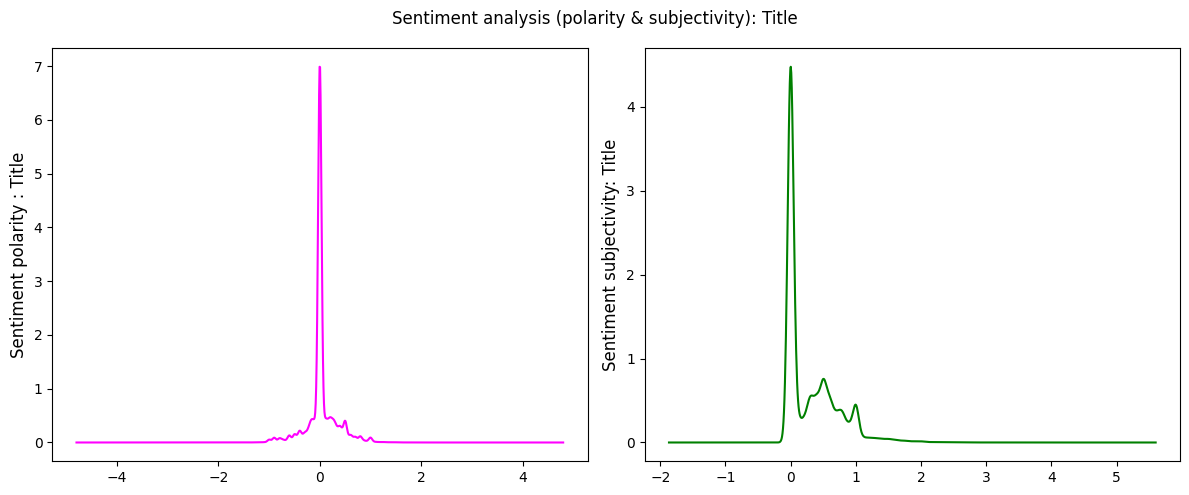

In [66]:
data_df['title_sentiment_polarity'] = data_df['title'].apply(lambda x: find_sentiment_polarity_textblob(x))
data_df['title_sentiment_subjectivity'] = data_df['title'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

plot_sentiment_textblob(data_df, "title", 'Title')

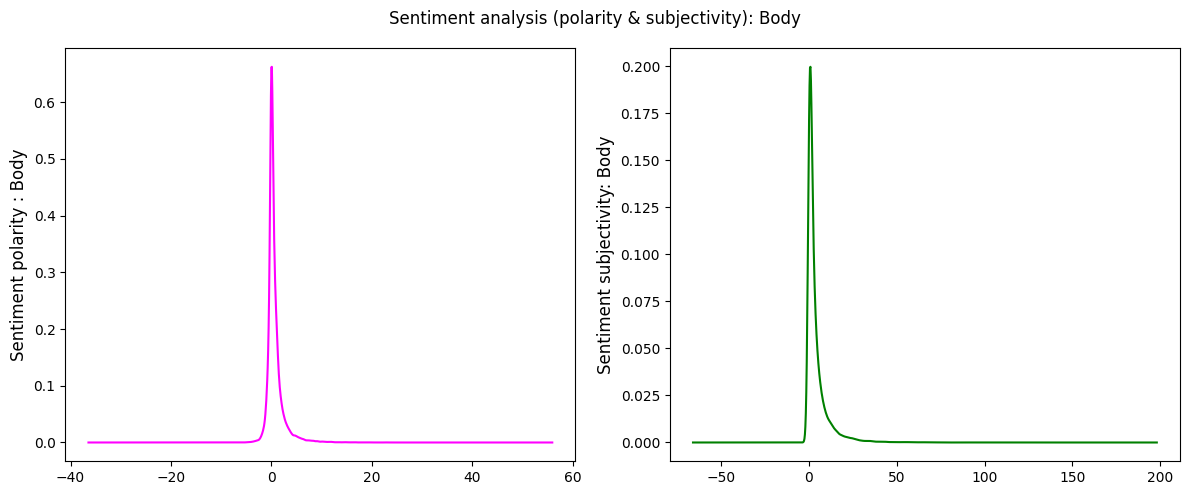

In [67]:
df['body_sentiment_polarity'] = df['body'].apply(lambda x: find_sentiment_polarity_textblob(x))
df['body_sentiment_subjectivity'] = df['body'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

plot_sentiment_textblob(df, "body", 'Body')